In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from tqdm import tqdm
from itertools import product

In [3]:
def tilde(x, delta=0, m=0):
    return np.sqrt(2) * x - (m+delta)/np.sqrt(2)

In [4]:
def phi(t):
    return (1/np.sqrt(2 * np.pi)) * np.exp(-(t**2) / 2)

In [5]:
def PHI(x, loc=0, scale=1):
    return stats.norm.cdf(x, loc=loc, scale=scale)

In [87]:
def minmax(a,b,delta,m,alpha, off, mu):
    E1 = PHI(b- mu) - PHI(b-delta) + PHI(a-delta) - PHI(a-mu)
    E2 = (np.exp(-((m-delta)/2)**2)/np.sqrt(2)) * (off + (alpha -1 )*(PHI(tilde(b,delta=delta, m=m)) - 
                                                                      PHI(tilde(a,delta=delta, m=m))))
    return E1 - E2


In [212]:
def Nash(range_max, step, m, alpha, off, mu, a, print_mode=False, title="title", savepic=(True, "nash_value.png")):
    x = np.arange(-range_max,range_max,step)
    y = np.arange(-range_max,range_max,step)
    X, Y = np.meshgrid(x, y)
    Z = minmax(a,X,Y,m,alpha, off, mu)
    if print_mode:
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=True, shade=False)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        fig.colorbar(surf, shrink=0.5, aspect=5)
        ax.set_zlabel("Value",fontsize="x-large")
        plt.xlabel("b", fontsize="x-large")
        plt.ylabel("delta", fontsize="x-large")
        plt.title(title, fontsize="x-large")
        if savepic[0]:
            plt.savefig(savepic[1])
        plt.show()
        plt.close()
    size = Z.shape[0]
    nash, b, delta, z_nash = False, None, None, None
    for i, j in product(range(size), range(size)):
        z = Z[i,j]
        zd = max([Z[i,k] for k in range(size)])
        zg = min([Z[l,j] for l in range(size)])
        if z == zd and z == zg:
            if print_mode:
                print("Nash")
            nash = True
            b = x[i]
            delta = y[j]
            z_nash = z
            
    return nash, b, delta, z

In [225]:
range_max = 6
step = .1
mu = 0
a = -1000
m = 4
alpha, off = 5,5

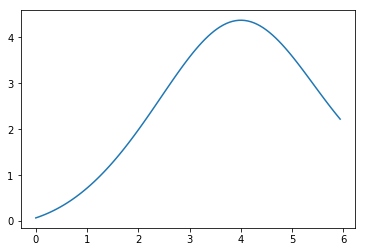

In [226]:
plt.plot([6 * delta/100 for delta in range(0,100)], [minmax(a=a,b=1,delta=6 * delta/100,m=m,alpha=alpha, off=off, mu=mu) for delta in range(0,100)])

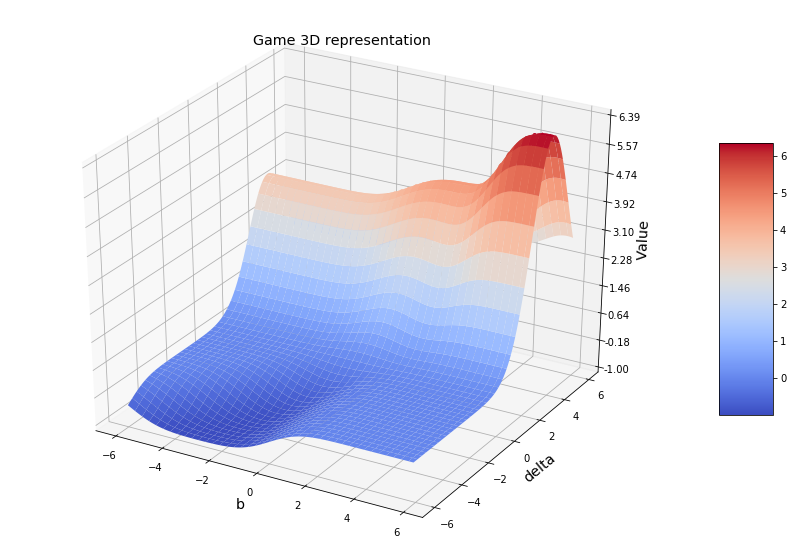

Nash


In [227]:
nash, _b, _d, _z = Nash(range_max=range_max,
                        step=step, 
                        m=m, 
                        alpha=alpha, 
                        off=off, 
                        mu=mu, 
                        a=a, 
                        print_mode=True, title="Game 3D representation")

In [228]:
_d, _b

(5.899999999999958, -6.0)

In [229]:
def Nash_on_m(m_min, m_max, m_step, range_max, step, alpha,off,mu,a,print_mode, savefig=(True, "nash-equilibriums.png")):
    tested_m = np.arange(m_min,m_max,m_step)
    Bs, Ds, Zs, Ms = [], [], [], []
    for m in tqdm(tested_m):
        nash, b, delta, z_nash = Nash(range_max=range_max,
                                 step=step, 
                                 m=m, 
                                 alpha=alpha, 
                                 off=off, 
                                 mu=mu, 
                                 a=a, 
                                 print_mode=False)
        if nash:
            Bs.append(b)
            Ds.append(delta)
            Zs.append(z_nash)
            Ms.append(m)
    if print_mode:
        plt.plot(Bs, Ds)
        plt.xlabel("b")
        plt.ylabel("delta")
        plt.title("Nash equilibriums")
        plt.show()
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(Bs, Ds, Zs)
        ax.set_xlabel('b')
        ax.set_ylabel('delta')
        ax.set_zlabel('Z')
        plt.title("Nash equilibriums")
        if savefig[0]:
            plt.savefig(savefig[1])
        plt.show()
        plt.close()
    return Bs, Ds, Zs, Ms

In [24]:
b_list, delta_list, z_list, m_list = Nash_on_m(m_min=0, m_max=10, m_step=.1, range_max=10, step=.1, alpha=alpha,off=off,mu=mu,a=a,print_mode=True)

 17%|█▋        | 17/100 [00:20<01:40,  1.21s/it]

KeyboardInterrupt: 

In [53]:
def plot_nash_state(b,delta,m, mu, xrange, save_fig=(False, "title")):
    real = [phi(x-mu) for x in xrange]
    generated = [phi(x-delta) for x in xrange]
    malveillance = [phi(x-m) for x in xrange]
    fig = plt.figure(figsize=(7,5))
    plt.plot(xrange, real, label= 'real')
    plt.plot(xrange, generated, label="generated")
    plt.plot(xrange, malveillance, label="malveillance")
    plt.vlines(b,-0.1,.5)
    plt.text(b, .4," refused")
    plt.text(b, .4,"accepted ",horizontalalignment='right')
    plt.ylim(-0.01, .45)
    plt.legend()
    if save_fig[0]:
        plt.savefig(save_fig[1] + ".png")
    plt.show()
    plt.close()    
    return True

In [ ]:
plot_nash_state(b_list[-1], delta_list[-1], m=10, mu=0, xrange=np.arange(-5,13, .1))

In [54]:
_b

0.8999999999999995

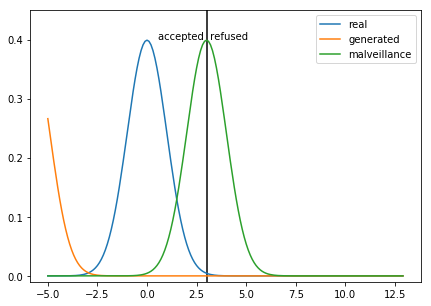

In [196]:
plot_nash_state(b=_b, delta=_d, m=m, mu=mu, xrange=np.arange(-5,13, .1), save_fig=(True, "equilibria"))